# **K Nearest Neighbour**

#### **Student Name:** Daniel Giedraitis 

#### **Student Number:** C00260331

#### **Module:** Data Science and Machine Learning 2 - Y4

<br>

For this project I will be using this [notebook](https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors/notebook) and making changes to it. This Jupyter notebook summarizes the Pros and Cons of the k-Nearest Neighbors algorithm and gives two Python examples on usage for Classification and Regression. 

## Theory<sup>1,2,3</sup>  
* Is a non-probabilistic, non-parametric and instance-based learning algorithm.
    * **Non-parametric** means it makes no explicit assumptions about the function form of _h_, avoiding the dangers of mis-modelling the underlying distribution of the data
        * For example, suppose our data is highly non-Gaussian but the learning model was choose assumes a Gaussian form. In that case, a parametric algorithm would make extremely poor predictions.
    * **Instance-based** learning means that the algorithm does not explicitly learn a model
        * Instead, it chooses to memorize the training instances which are subsequently used as "knowledge" for the prediction phase
        * Concretely, this means that only when a query to our database is made (i.e., when we ask it to predict a label given an input), will the algorithm use the training instances to predict the result

### Pros
* Simple to understand and implement
* Little to zero training time
* kNN works just as easily with multi-class data sets whereas other algorithms are hard-coded for the binary setting
* The non-parametric nature of kNN gives it an edge in certain settings where the data may be highly unusual, thus without prior knowledge on distribution

### Cons 
* Computationally expensive testing phase
    * We need to store the whole data set for each decision!
* Can suffer from skewed class distributions
    * For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common)
* The accuracy can be severally degraded with high-dimension data because of the little difference between the nearest and farthest neighbor
    * The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience
    * For high-dimensional data (e.g., with number of dimensions more than 10) scaling and dimension reductions (such as PCA) is usually performed prior applying kNN
    
### References 
* Wikipedia [kNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), [Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) 
* Sklearn [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* [Complete Guide to K-Nearest-Neighbors](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor)

<br>

## **Business Understanding**

**Objective:**

The objective of this project is to apply the k-Nearest Neighbors (kNN) algorithm for both classification and regression tasks. For classification, we aim to predict the likelihood of diabetes based on various health metrics such as glucose levels, blood pressure, and BMI. For regression, we aim to predict property tax rates based on features like crime rates, average number of rooms, and proximity to employment centers.

<br>

## **Change Log:**

- **Classification Data Set:** Swapped the iris dataset with diabetes_data.csv, containing columns for pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, age, and outcome.

- **Regression Data Set:** Swapped the California Housing dataset with BostonHousing.csv, which includes features like crime rate, proportion of residential lots, nitrogen oxide concentration, average number of rooms, and others, along with the target variable of house prices.

<br>

## **Data Understanding**

For classification, we will use the [diabetes_data.csv](https://www.kaggle.com/datasets/rahulsah06/machine-learning-for-diabetes-with-python) dataset, which contains information about pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, age, and the outcome (whether the individual has diabetes or not). For regression, we will use the [BostonHousing.csv](https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset) dataset, which includes features like crime rate, proportion of residential lots, nitrogen oxide concentration, average number of rooms, and property tax rates.

<br>

## **Data Preparation**

#### **Preprocessing:**
**Classification Data:** Check for missing values and handle them appropriately. Split the data into features (X) and target variable (y). Scale the features and perform dimensionality reduction using PCA.

**Regression Data:** Inspect the data for missing values and outliers. Scale the features and reduce dimensionality using PCA.

<br>

## **Modeling**

#### **Training the kNN Classifier:**
**Classification:** Train the kNN classifier using the optimal k value obtained through grid search.


#### **Training the kNN Regressor:**
**Regression:** Train the kNN regressor using grid search to find the optimal combination of hyperparameters.

<br>

## **Evaluation**

#### **Model Performance:**
**Classification:** Evaluate the performance of the kNN classifier using metrics such as accuracy, precision, recall, and F1-score.

**Regression:** Assess the performance of the kNN regressor using metrics like root mean squared error (RMSE).

<br>

## **Section 1: Classification**

* The output is a class membership
* An object is classified by a majority vote of its neighbours, with the object being assigned to the class most common among its k nearest neighbours
    * if k = 1, then the object is simply assigned to the class of that nearest neighbour

In this section, we import all the necessary libraries for data manipulation, visualization, machine learning, and evaluation.

In [134]:
# Load necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Here, we load the diabetes dataset from a CSV file named "diabetes_data.csv" into a pandas DataFrame called 'diabetes_data'.

In [135]:
# Load the diabetes dataset
diabetes_data = pd.read_csv("datasets/diabetes_data.csv")

This line prints the first few rows of the dataset to understand its structure and check if it has been loaded correctly.

In [136]:
# Display the first few rows of the dataset
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Here, we visualize the distribution of each feature in the dataset using histograms.

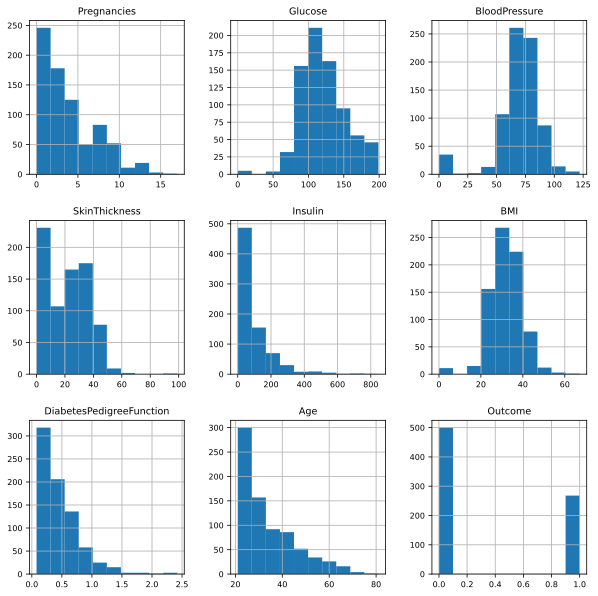

In [137]:
# Show histogram (distribution) of features
diabetes_data.hist(figsize=(10, 10))
plt.show()

This code generates a correlation matrix heatmap to visualize the correlations between different features in the dataset.

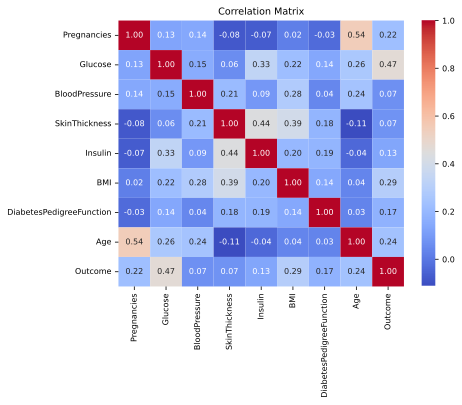

In [138]:
# Show correlation matrix
corr_matrix = diabetes_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Here, we separate the features (independent variables) from the target variable (dependent variable). 'X' contains all the features except the "Outcome" column, and 'y' contains the "Outcome" column, which is our target variable.

In [139]:
# Separate features and target variable
X = diabetes_data.drop(columns=["Outcome"])
y = diabetes_data["Outcome"]


This code standardizes the features by subtracting the mean and scaling to unit variance. It's a crucial step for many machine learning algorithms, including K-nearest neighbors.

In [140]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


PCA is used here to reduce the dimensionality of the data while retaining most of the variance. We choose to reduce the data to 3 principal components (n_components=3).

In [141]:
# Reduce dimensionality using PCA
pca = PCA(n_components=3)  # Choose number of components
X_pca = pca.fit_transform(X_scaled)


This line splits the dataset into training and testing sets. We allocate 80% of the data to training (X_train, y_train) and 20% to testing (X_test, y_test). The random_state parameter ensures reproducibility.

In [142]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


This code performs hyperparameter tuning using GridSearchCV to find the best parameters for the K-nearest neighbors classifier.

In [143]:
# Find optimal k value using GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

Here, we print the best parameters found by GridSearchCV.

In [144]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}


This line evaluates the model's accuracy by comparing the predicted values (y_pred) with the actual values (y_test).

In [145]:
# Evaluate the model
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7337662337662337


Finally, this code generates a classification report, which includes precision, recall, F1-score, and support for each class.

In [146]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



<br>

## Section 2: Regression

* Predicts value as the average of the values of its k nearest neighbors

Here, we import all the necessary libraries for data manipulation, visualization, machine learning, and evaluation.

In [147]:
# Load necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


This line loads the Boston Housing dataset from a CSV file named "BostonHousing.csv" into a pandas DataFrame called 'boston_data'.

In [148]:
# Load the Boston Housing dataset
boston_data = pd.read_csv("datasets/BostonHousing.csv")


This code prints the first few rows of the dataset to understand its structure and check if it has been loaded correctly.

In [149]:
# Display the first few rows of the dataset
print(boston_data.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Here, we visualize the distribution of each feature in the dataset using histograms.

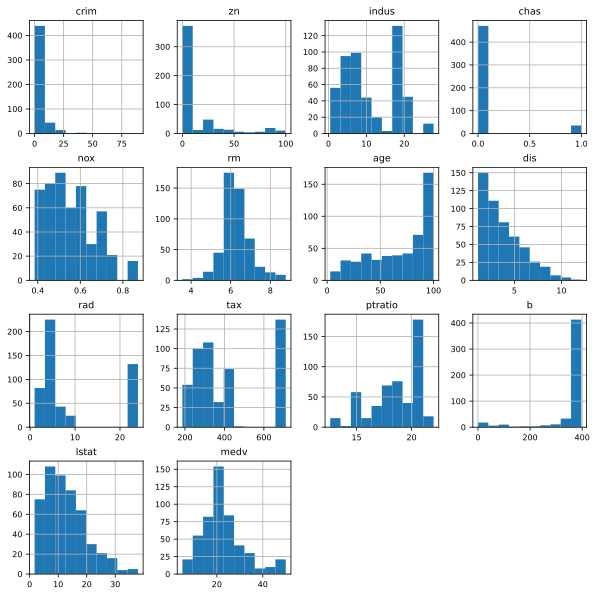

In [150]:
# Show histogram (distribution) of features
boston_data.hist(figsize=(10, 10))
plt.show()


This code generates a correlation matrix heatmap to visualize the correlations between different features in the dataset.

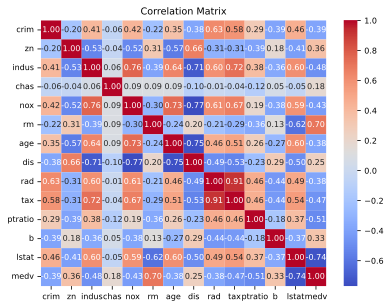

In [151]:
# Show correlation matrix
corr_matrix = boston_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Here, we drop rows with missing values to ensure that the dataset is clean and ready for analysis.

In [152]:
# Drop rows with missing values
boston_data.dropna(inplace=True)


This code separates the features (independent variables) from the target variable (dependent variable). 'X' contains all the features except the "tax" column, and 'y' contains the "tax" column, which is our target variable.

In [153]:
# Separate features and target variable
X = boston_data.drop(columns=["tax"])
y = boston_data["tax"]


This code standardizes the features by subtracting the mean and scaling to unit variance. It's a crucial step for many machine learning algorithms, including K-nearest neighbors.

In [154]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


PCA is used here to reduce the dimensionality of the data while retaining most of the variance. We choose to reduce the data to 6 principal components (n_components=6).

In [155]:
# Reduce dimensionality using PCA
pca = PCA(n_components=6)  # Choose number of components
X_pca = pca.fit_transform(X_scaled)


This line splits the dataset into training and testing sets. We allocate 80% of the data to training (X_train, y_train) and 20% to testing (X_test, y_test). The random_state parameter ensures reproducibility.

In [156]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


This code performs hyperparameter tuning using GridSearchCV to find the best parameters for the K-nearest neighbors regressor.

In [157]:
# Find optimal k value using GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

Here, we print the best parameters found by GridSearchCV.

In [158]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}


This line evaluates the model's performance using the root mean squared error (RMSE), which measures the difference between the predicted values (y_pred) and the actual values (y_test).

In [159]:
# Evaluate the model
y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 68.13124532644564


<br>

## **Deployment**

#### **Serialised Model:**
I will serialize the trained kNN classifier and kNN regressor into a serialized format for deployment. These serialized models can then be integrated into a web application or any other deployment platform for real-time predictions.

#### **Change Log:**
- Serialized the trained kNN classifier and kNN regressor into pickle files.

In [160]:
import joblib

# Save trained kNN classifier model
joblib.dump(grid_search, 'models/knn_classifier_model.pkl')

# Save trained kNN regressor model
joblib.dump(grid_search, 'models/knn_regressor_model.pkl')

# Load the saved models
knn_classifier_model = joblib.load('models/knn_classifier_model.pkl')
knn_regressor_model = joblib.load('models/knn_regressor_model.pkl')



<br>

## **Conclusion**

Based on the analysis conducted using k-Nearest Neighbors (kNN) algorithm for both classification and regression tasks, the following conclusions can be drawn:

#### **Key Findings:**
1. **Data Exploration:** The examination of the diabetes_data.csv and BostonHousing.csv datasets provided insights into the structure and characteristics of the data, guiding preprocessing steps and feature selection methods.

2. **Data Preparation:** Preprocessing involved handling missing values and scaling features to ensure consistency and enhance model performance. Additionally, dimensionality reduction using PCA was applied to reduce computational complexity and improve model efficiency.

3. **Modeling:** Separate kNN classifiers and regressors were trained on the prepared datasets to learn the underlying patterns and relationships between features and target variables.

4. **Evaluation:** The trained kNN models were evaluated using appropriate metrics such as accuracy, precision, recall, F1-score for classification, and root mean squared error (RMSE) for regression. Additionally, visualization tools like histograms and correlation matrices provided further insights into the data distribution and feature relationships.

#### **Key Outcomes:**
- **Classification Performance:** The kNN classifier achieved an accuracy of 73% on the diabetes dataset, indicating moderate performance in predicting diabetes outcomes based on health metrics.

- **Regression Performance:** The kNN regressor produced an RMSE of 68.13 on the Boston Housing dataset, indicating the average deviation of predicted property tax rates from the actual values.

#### **Conclusion:**
In conclusion, the k-Nearest Neighbors (kNN) algorithm demonstrated its versatility and effectiveness in both classification and regression tasks. The classifier and regressor models showcased moderate to satisfactory performance in predicting diabetes outcomes and property tax rates, respectively. This project underscores the utility of kNN algorithm in various predictive tasks and highlights the importance of appropriate data preprocessing and model evaluation techniques.